In [536]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 



url = "C:/Users/Nimrod/Documents/GitHub/2nd_try_iron_repo/week4/marketing_customer_analysis_clean.csv"

df = pd.read_csv(url)

In [537]:
df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [538]:
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(exclude='number')

df_cat = df_cat.drop(['customer', 'effective_to_date', 'response'], axis=1)

In [539]:
ordinals = df_cat[['coverage', 'education', 'vehicle_size']]
nominals = df_cat.drop(ordinals, axis=1)

In [540]:
ordinals['vehicle_size'].value_counts()

vehicle_size
Medsize    7873
Small      1966
Large      1071
Name: count, dtype: int64

In [541]:
# Get Dummies & OrdinalEncoder 
nominals = pd.get_dummies(nominals, dtype=int)

# Ordinal Encoder 
enc = OrdinalEncoder(categories=[['Basic', 'Extended', 'Premium']])

ordinals['coverage'] = enc.fit_transform(ordinals[['coverage']])

enc = OrdinalEncoder(categories=[['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']])

ordinals['education'] = enc.fit_transform(ordinals[['education']])

enc = OrdinalEncoder(categories=[['Small', 'Medsize', 'Large']])

ordinals['vehicle_size'] = enc.fit_transform(ordinals[['vehicle_size']])


C:\Users\Nimrod\AppData\Local\Temp\ipykernel_18528\1439113250.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals['coverage'] = enc.fit_transform(ordinals[['coverage']])
C:\Users\Nimrod\AppData\Local\Temp\ipykernel_18528\1439113250.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals['education'] = enc.fit_transform(ordinals[['education']])
C:\Users\Nimrod\AppData\Local\Temp\ipykernel_18528\1439113250.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [542]:
cat_df = pd.concat([ordinals, nominals], axis=1)

cat_df

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,0.0,2.0,1.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0.0,2.0,1.0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0.0,1.0,1.0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
3,1.0,2.0,1.0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,2.0,1.0,1.0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2.0,1.0,1.0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10906,0.0,2.0,1.0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
10907,1.0,1.0,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
10908,2.0,2.0,1.0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


In [543]:
df_num.columns

Index(['unnamed:_0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount', 'month'],
      dtype='object')

In [544]:
df_num = df_num.drop_duplicates()

df_num.isna().any()

unnamed:_0                       False
customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
total_claim_amount               False
month                            False
dtype: bool

## Spltting & Scalling

In [545]:
# Concat cat_df + num_df 
df_pre_split = pd.concat([cat_df, df_num], axis=1)

df_pre_split

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,...,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0.0,2.0,1.0,1,0,0,0,0,0,1,...,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,0.0,2.0,1.0,0,1,0,0,0,0,0,...,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,0.0,1.0,1.0,0,0,0,0,1,0,1,...,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,1.0,2.0,1.0,0,0,0,1,0,0,1,...,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,2.0,1.0,1.0,0,0,0,1,0,0,0,...,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2.0,1.0,1.0,0,0,1,0,0,0,0,...,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,0.0,2.0,1.0,0,0,0,1,0,0,1,...,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,1.0,1.0,1.0,1,0,0,0,0,0,1,...,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,2.0,2.0,1.0,0,1,0,0,0,0,1,...,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [546]:
# splitting

X = df_pre_split.drop(['total_claim_amount', 'unnamed:_0', 'month'], axis=1)
y = df_pre_split[['total_claim_amount']]

In [547]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [548]:
# past split scaling 

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



## Apply linear regression.


In [549]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)



In [550]:
model.coef_


array([[-1.63500408e+01, -3.00754061e+01,  3.89961053e-01,
         1.11116881e+14,  1.11116881e+14,  1.11116881e+14,
         1.11116881e+14,  1.11116881e+14,  1.41375238e+13,
         1.41375238e+13,  1.41375238e+13,  1.41375238e+13,
         1.41375238e+13, -4.41668045e+15, -4.41668045e+15,
         8.64084622e+14,  8.64084622e+14,  8.64084622e+14,
         2.06130814e+15,  2.06130814e+15,  2.06130814e+15,
        -1.48278343e+15, -3.24876956e+15, -4.91765397e+14,
        -1.51787294e+14, -1.51787294e+14, -1.51787294e+14,
         1.61419884e+15,  1.61419884e+15,  1.61419884e+15,
        -1.14280533e+15, -1.14280533e+15, -1.14280533e+15,
         4.64883679e+13,  4.64883679e+13,  4.64883679e+13,
         4.64883679e+13,  8.92607111e+14,  8.92607111e+14,
         8.92607111e+14,  8.92607111e+14,  5.92834217e+14,
         5.92834217e+14,  5.92834217e+14,  5.92834217e+14,
         5.92834217e+14,  5.92834217e+14,  0.00000000e+00,
        -1.27890625e+01, -3.18007812e+01,  1.24462500e+0

In [551]:
model.intercept_

array([1.46867431e+15])

## Model Interpretation

In [552]:
y_pred

,0
0,371.56250
1,418.15625
2,541.31250
3,580.96875
4,330.31250
...,...
2723,532.65625
2724,416.40625
2725,28.90625
2726,479.00000


In [553]:
y_pred = model.predict(X_test)

y_pred = pd.DataFrame(y_pred)

In [554]:
y_test = y_test.reset_index(drop=True)

r_df = pd.concat([y_test, y_pred], axis=1) 

r_df = r_df.rename(columns={"total_claim_amount": "y_test", 0: "y_pred"})

In [555]:
r_df.isna().sum()

y_test    0
y_pred    0
dtype: int64

In [556]:
r_df.head(3)

,y_test,y_pred
0,475.423848,379.00
1,350.400000,427.75
2,482.400000,550.50


In [557]:
r_df['residual'] = r_df['y_test']-r_df['y_pred']
r_df.head()

,y_test,y_pred,residual
0,475.423848,379.00,96.423848
1,350.400000,427.75,-77.350000
2,482.400000,550.50,-68.100000
3,673.342650,567.00,106.342650
4,302.400000,318.75,-16.350000


In [558]:
# Extracting predictions from the train data 

y_train_pred = model.predict(X_train)

y_train_pred = pd.DataFrame(y_train_pred)

In [559]:
y_train = y_train.reset_index(drop=True)

train_r_df = pd.concat([y_train, y_train_pred], axis=1) 

train_r_df = train_r_df.rename(columns={"total_claim_amount": "y_train", 0: "y_train_pred"})

In [560]:
y_train_pred.shape
y_train.shape

(8182, 1)

In [561]:
train_r_df

,y_train,y_train_pred
0,897.600000,1090.00
1,504.000000,616.50
2,542.016902,532.00
3,571.200000,687.25
4,504.000000,557.25
...,...,...
8177,777.600000,729.00
8178,470.400000,614.75
8179,331.200000,438.75
8180,336.000000,533.50


## Model Interpretation

In [562]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
import numpy as np

In [563]:
RMSE = np.sqrt(mse(y_test, y_pred))
MAE = mae(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f'\nModel Interpretation Test:\n{"*"*26}\nMAE:{MAE}\nRMSE: {RMSE}\nR2: {round(R2,3)}')

RMSE_train = np.sqrt(mse(y_train, y_train_pred))
MAE_train = mae(y_train, y_train_pred)
R2_train = r2_score(y_train, y_train_pred)

print(f'\nModel Interpretation Train:\n{"*"*26}\nMAE:{MAE_train}\nRMSE: {RMSE_train}\nR2: {round(R2_train,3)}')


Model Interpretation Test:
**************************
MAE:96.4715658797654
RMSE: 138.9471700714037
R2: 0.768

Model Interpretation Train:
**************************
MAE:96.07356876656075
RMSE: 140.75992383325612
R2: 0.77


In [564]:
feature_names = list(X.columns)
coef = model.coef_
coef = [i for i in coef[0]]

In [565]:
fi_dict = {'names': feature_names, 'coeff': coef}

fi = pd.DataFrame(fi_dict)

<Axes: xlabel='coeff', ylabel='names'>

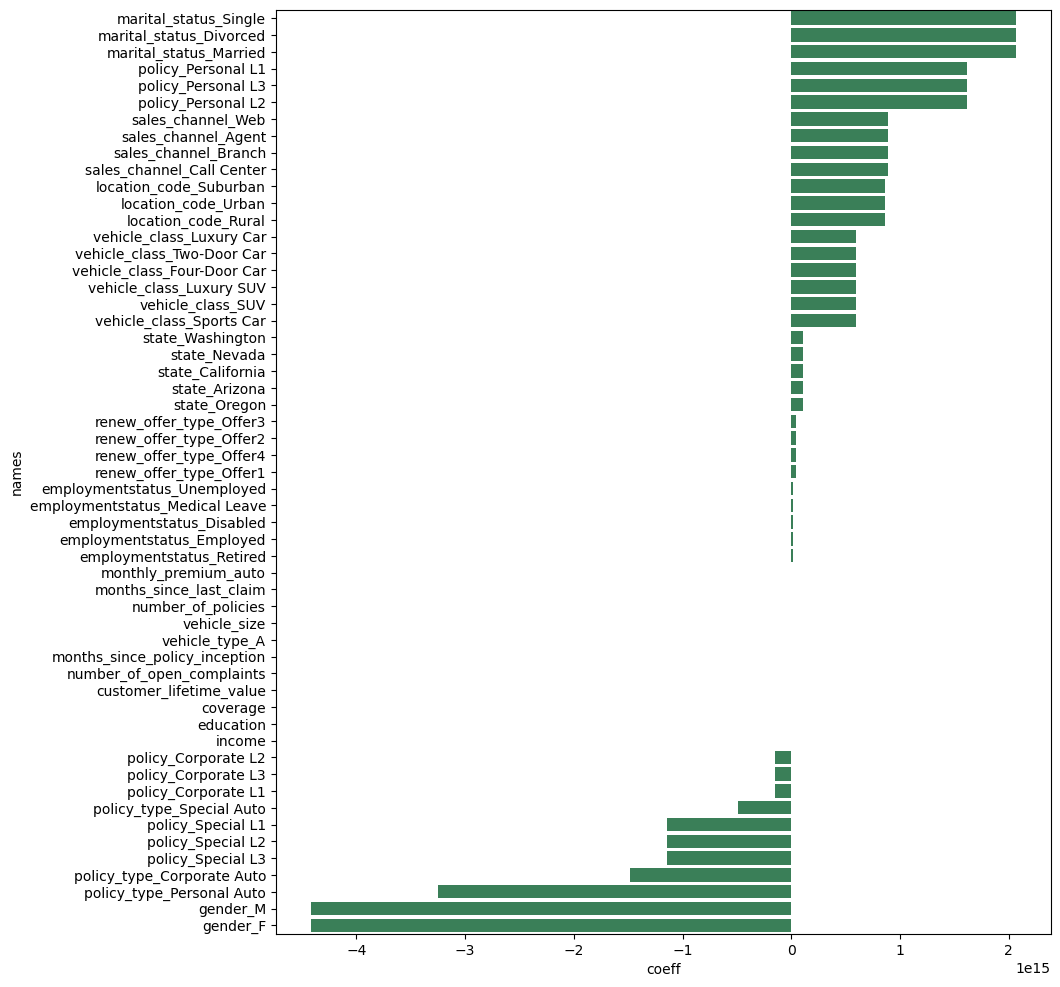

In [566]:
# fi_test = fi[fi['coeff'] == 0.00000000e+00]

# fi_sorted = fi[fi['coeff'] != 0]


fi_sorted = fi.sort_values(by='coeff', ascending=False)


plt.figure(figsize=(10,12))
sns.barplot(y = fi_sorted['names'], x= fi_sorted['coeff'], color='seagreen')

In [567]:
fi.sort_values(by='coeff', ascending=False)

,names,coeff
20,marital_status_Single,2.061308e+15
18,marital_status_Divorced,2.061308e+15
19,marital_status_Married,2.061308e+15
27,policy_Personal L1,1.614199e+15
29,policy_Personal L3,1.614199e+15
28,policy_Personal L2,1.614199e+15
40,sales_channel_Web,8.926071e+14
37,sales_channel_Agent,8.926071e+14
38,sales_channel_Branch,8.926071e+14
39,sales_channel_Call Center,8.926071e+14
